<a href="https://colab.research.google.com/github/saqib-ali/cse-578/blob/main/CSE_578_Team_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 !wget /resources/data/adult.data https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
adultdatafile = "/content/adult.data"
!wget /resources/data/adult.test https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test
adulttestfile = "/content/adult.test"



import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy

!pip install --upgrade geopandas
import geopandas as gpd

plt.style.use('seaborn-whitegrid')

adultdata = pd.read_csv(adultdatafile, header=None) 


#adulttest = pd.read_csv(adulttestfile, header=None) 


/resources/data/adult.data: Scheme missing.
--2021-04-18 06:05:49--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data.1’

adult.data.1        100%[===================>]   3.79M  3.56MB/s    in 1.1s    

2021-04-18 06:05:51 (3.56 MB/s) - ‘adult.data.1’ saved [3974305/3974305]

FINISHED --2021-04-18 06:05:51--
Total wall clock time: 1.7s
Downloaded: 1 files, 3.8M in 1.1s (3.56 MB/s)
/resources/data/adult.test: Scheme missing.
--2021-04-18 06:05:51--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP re

In [2]:
adultdata.columns=['age', 'workclass', 'fnlwgt', 'education',  'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gains', 'capital-loss', 'hours-per-week','native-country', 'income']
adultdata.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gains,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [3]:
native_country_income = adultdata.iloc[:, [13,14]]
native_country_income.columns=['country', 'cogs']
native_country_income.head()
country_income_grouped = native_country_income.groupby(['country','cogs'])['cogs'].count()
country_income_grouped.head(30)

country              cogs  
 ?                    <=50K    437
                      >50K     146
 Cambodia             <=50K     12
                      >50K       7
 Canada               <=50K     82
                      >50K      39
 China                <=50K     55
                      >50K      20
 Columbia             <=50K     57
                      >50K       2
 Cuba                 <=50K     70
                      >50K      25
 Dominican-Republic   <=50K     68
                      >50K       2
 Ecuador              <=50K     24
                      >50K       4
 El-Salvador          <=50K     97
                      >50K       9
 England              <=50K     60
                      >50K      30
 France               <=50K     17
                      >50K      12
 Germany              <=50K     93
                      >50K      44
 Greece               <=50K     21
                      >50K       8
 Guatemala            <=50K     61
                      >50K 

Text(0.5, 1.0, 'Proportion of the people earning >50K')

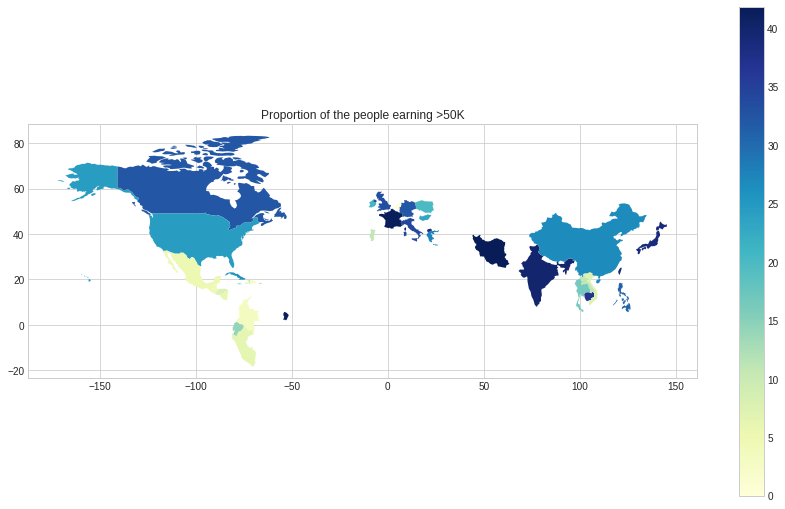

In [4]:


import matplotlib.pyplot as plt
adultdata['native-country'] = adultdata['native-country'].map(lambda x: x.strip())
adultdata['income'] = adultdata['income'].map(lambda x: x.strip())

adultdata = adultdata.replace(to_replace ="United-States",
                 value ="United States of America")
adultdata = adultdata.replace(to_replace ="Dominican-Republic",
                 value ="Dominican Rep.")
adultdata = adultdata.replace(to_replace ="England",
                 value ="United Kingdom")
adultdata = adultdata.replace(to_replace ="El-Salvador",
                 value ="El Salvador")
adultdata = adultdata.replace(to_replace ="Holand-Netherlands",
                 value ="Netherlands")
adultdata = adultdata.replace(to_replace ="Puerto-Rico",
                 value ="Puerto Rico")
adultdata = adultdata.replace(to_replace ="Trinadad and Tobago",
                 value ="Trinidad and Tobago")
adultdata = adultdata.replace(to_replace ="Yugoslavia",
                 value ="Macedonia")
adultdata = adultdata.replace(to_replace ="Columbia",
                 value ="Colombia")

high_income_proportion =  (adultdata.replace({"<=50K": 0, ">50K": 1}).groupby("native-country")["income"].mean()* 100).reset_index()
high_income_proportion.columns=['native-country', 'proportion']


#print(high_income_proportion.sort_values(by=['proportion'], ascending=False))

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
#world.name.unique()
#print(world)
for_plotting = world.merge(high_income_proportion, left_on = 'name', right_on = 'native-country')
#print(for_plotting['name'])
ax = for_plotting.dropna().plot(column='proportion', cmap =    
                                'YlGnBu', figsize=(15,9)   
                                , k=3, legend =  
                                  True);
plt.title('Proportion of the people earning >50K')
#print(for_plotting['name'])
#print(high_income_proportion['native-country'])

#high_income_proportion["exists"] = for_plotting.drop("name", 1).isin(high_income_proportion["native-country"]).any(1)

#col_one_list = for_plotting['name'].tolist()
#for country in high_income_proportion["native-country"]:
  #if not (country in col_one_list):
    #print (country)
  #else:
    #print(country)



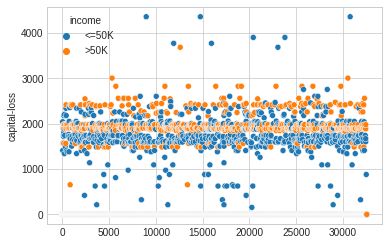

In [5]:
sns.scatterplot(x=adultdata.index, y=adultdata['capital-loss'], hue=adultdata['income'])


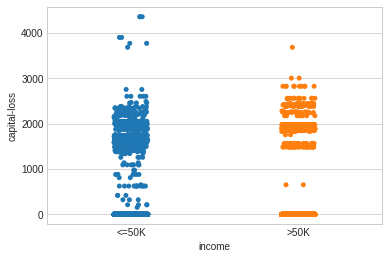

In [6]:
sns.stripplot(x=adultdata['income'], y=adultdata['capital-loss'])

Text(0.5, 0, 'Observation Number')

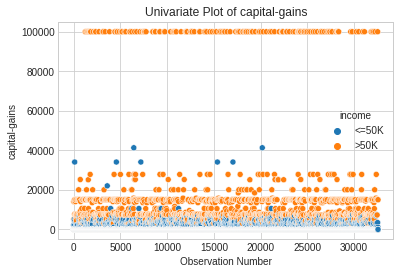

In [7]:
#sns.set_palette("viridis")
ax = sns.scatterplot(x=adultdata.index, y=adultdata['capital-gains'], hue=adultdata['income'])
ax.set_title("Univariate Plot of capital-gains")
ax.set_xlabel('Observation Number')



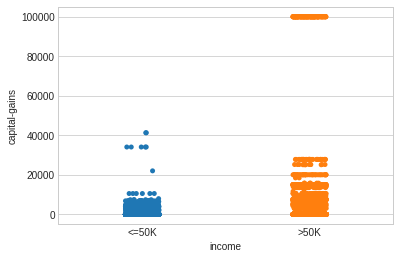

In [8]:
sns.stripplot(x=adultdata['income'], y=adultdata['capital-gains'])

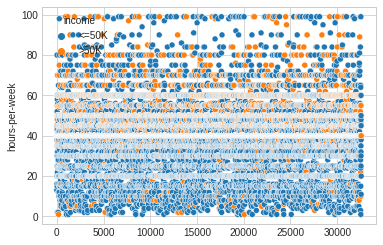

In [9]:
sns.scatterplot(x=adultdata.index, y=adultdata['hours-per-week'], hue=adultdata['income'])


In [10]:
#age distribution histogram

lower_income_subset = adultdata.loc[adultdata['income'] == '<=50K']
upper_income_subset = adultdata.loc[adultdata['income'] == '>50K']
upper_income_subset = adultdata[adultdata['income'].str.contains(">50K")]
lower_income_subset = adultdata[adultdata['income'].str.contains("<=50K")]
upper_income_subset.head()
#print(len(upper_income_subset))
#ax =  sns.displot(adultdata, x="age", hue="income", element="step", binwidth=3)
#plt.ylabel('Frequency')


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gains,capital-loss,hours-per-week,native-country,income
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United States of America,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United States of America,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United States of America,>50K
10,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United States of America,>50K
11,30,State-gov,141297,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,India,>50K


Text(0.5, 1.0, 'Histogram of the education-num subset by income bracket')

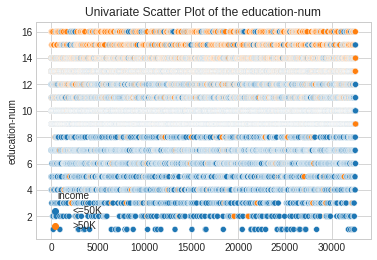

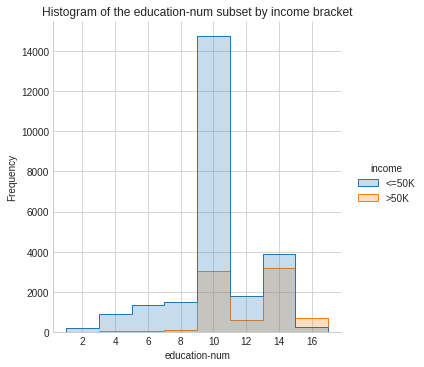

In [11]:
sns.scatterplot(x=adultdata.index, y=adultdata['education-num'], hue=adultdata['income'])
plt.title("Univariate Scatter Plot of the education-num")
ax =  sns.displot(adultdata, x="education-num", hue="income", element="step", binwidth=2)
plt.ylabel('Frequency')
plt.title("Histogram of the education-num subset by income bracket")


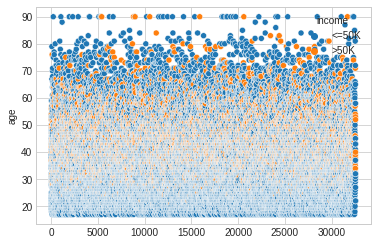

In [12]:
sns.scatterplot(x=adultdata.index, y=adultdata['age'], hue=adultdata['income'])

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


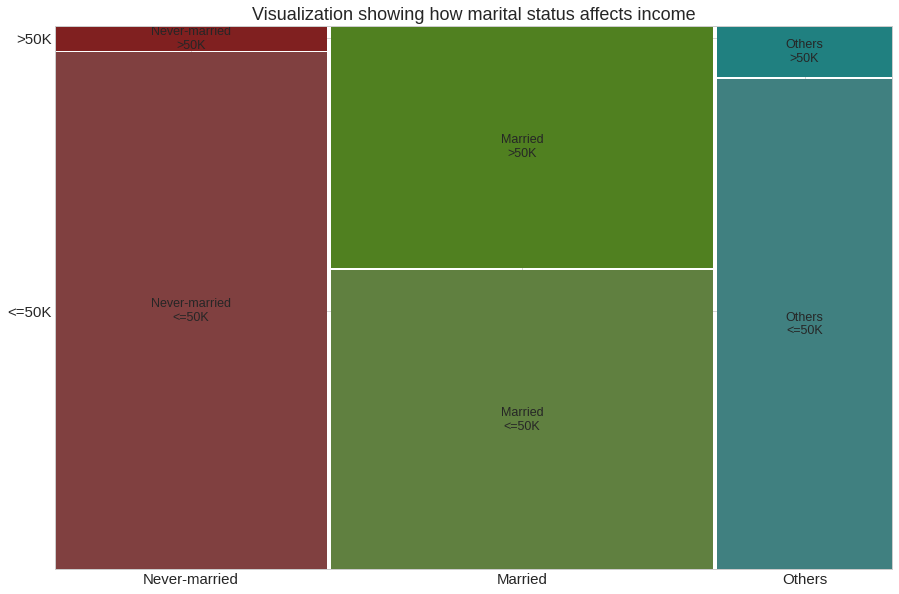

In [13]:
#Relationship between Marital-status and Income attribute.
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams["figure.figsize"]=(15,10)
# Categories -Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

def find_status_bin(stat):
    married = ['Married-civ-spouse','Married-AF-spouse']
    nevermarried = ['Never-married']
    others = ['Married-spouse-absent','Divorced','Separated','Widowed']       
    bin=''
    
    if stat.strip() in married:
        bin='Married' 
    elif stat.strip() in nevermarried:
        bin='Never-married'
    elif stat.strip() in others:
        bin='Others'
    return bin
   
adultdata['status_bin'] = adultdata['marital-status'].apply(find_status_bin)
plt.rcParams['font.size'] = 15.0
mosaic(adultdata, ['status_bin','income'], title="Visualization showing how marital status affects income")
plt.show()


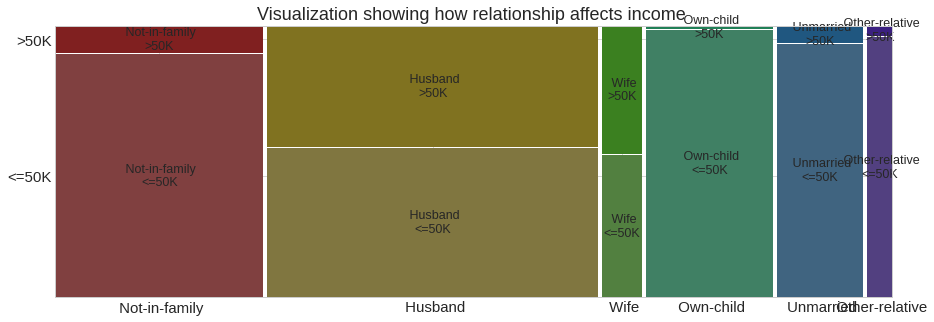

In [14]:
#Visualization showing how relationship affects income
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams["figure.figsize"]=(15, 5)
data=adultdata
mosaic(data,['relationship','income'],title='Visualization showing how relationship affects income ')

plt.ylabel('Income')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


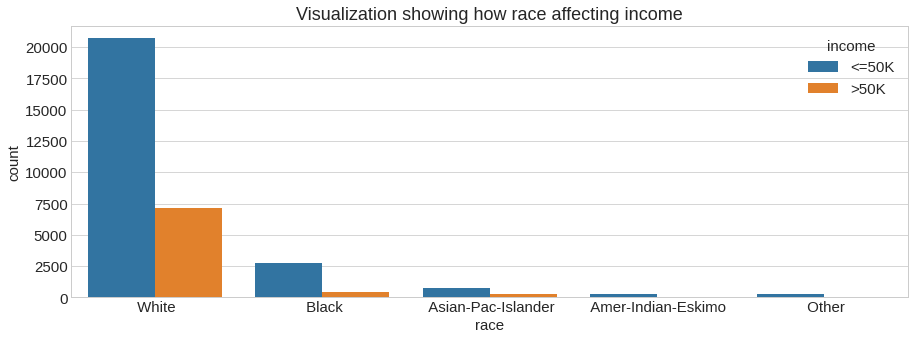

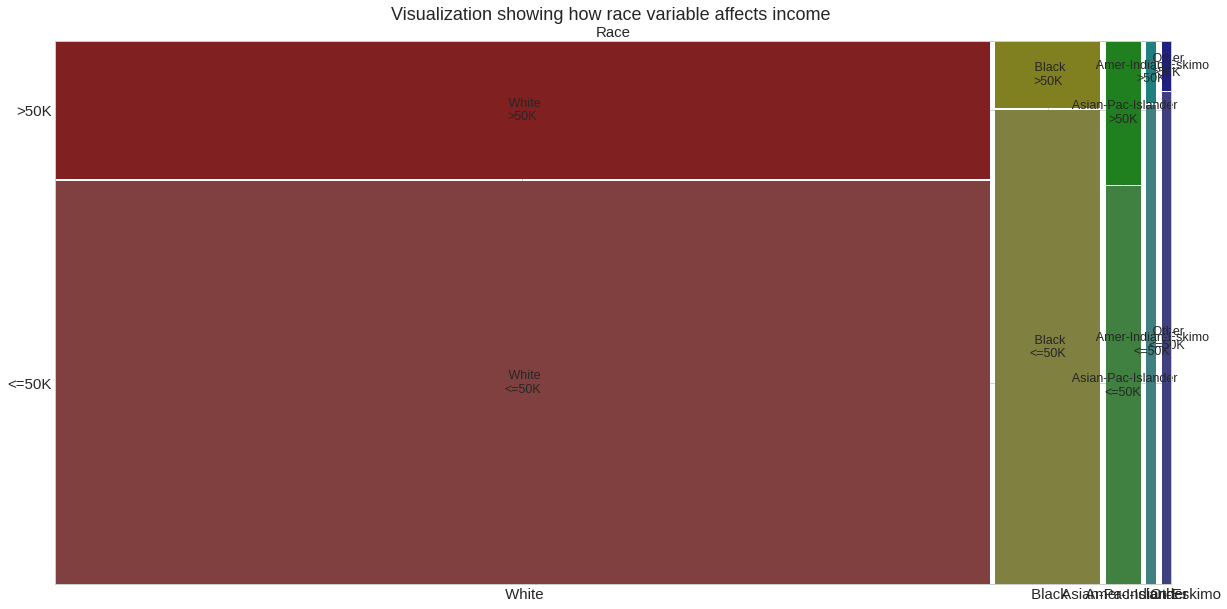

In [15]:
#Relationship between Race and Income varible
sns.countplot(adultdata.race,hue=adultdata['income'])
plt.title('Visualization showing how race affecting income')
plt.show()
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams["figure.figsize"]=(20, 10)
mosaic(data=adultdata,index=['race','income'],title='Visualization showing how race variable affects income ')
plt.xlabel('Race')
plt.ylabel('Income')
plt.show()


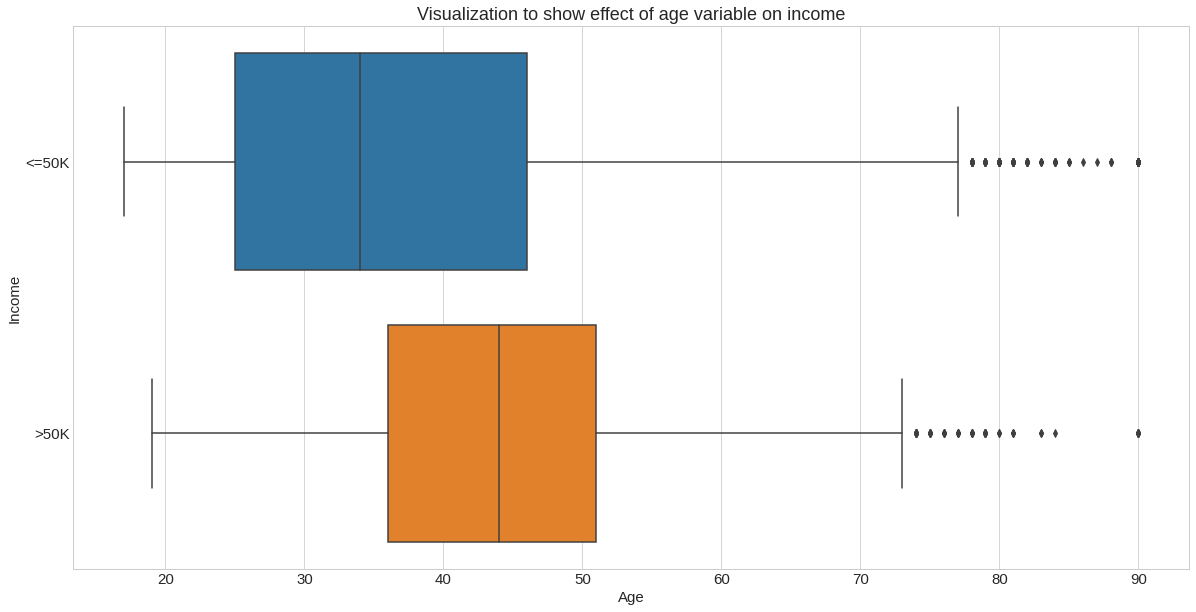

In [16]:
#Relationship between Age and Income variable
sns.boxplot(x='age',y='income',data=adultdata)
plt.xlabel('Age')
plt.ylabel('Income')
plt.title('Visualization to show effect of age variable on income')
plt.show()


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


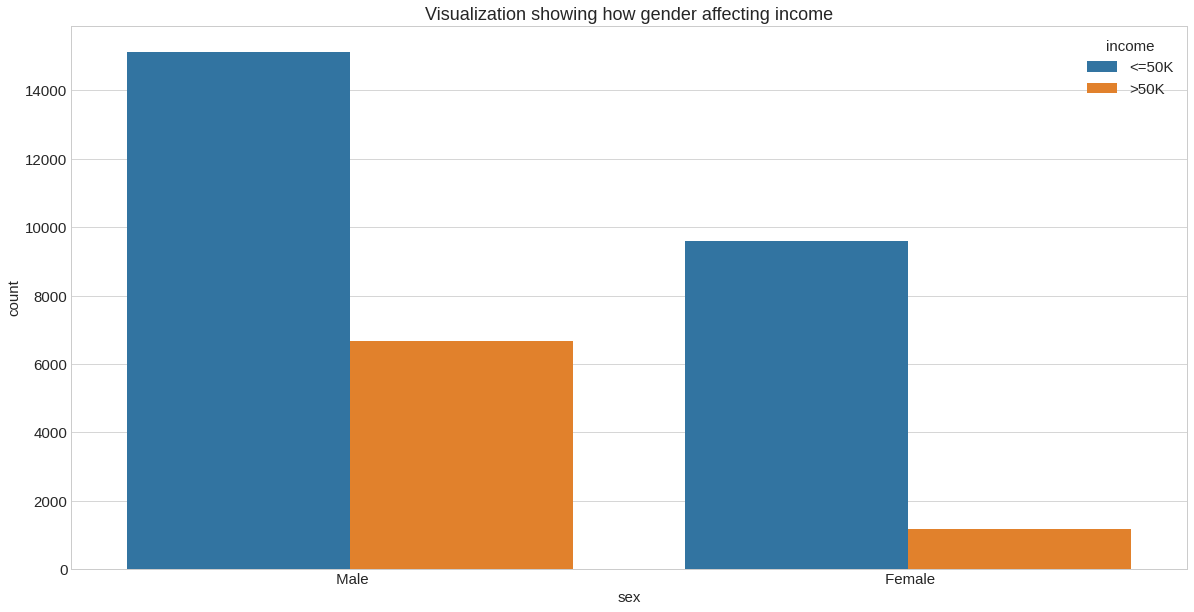

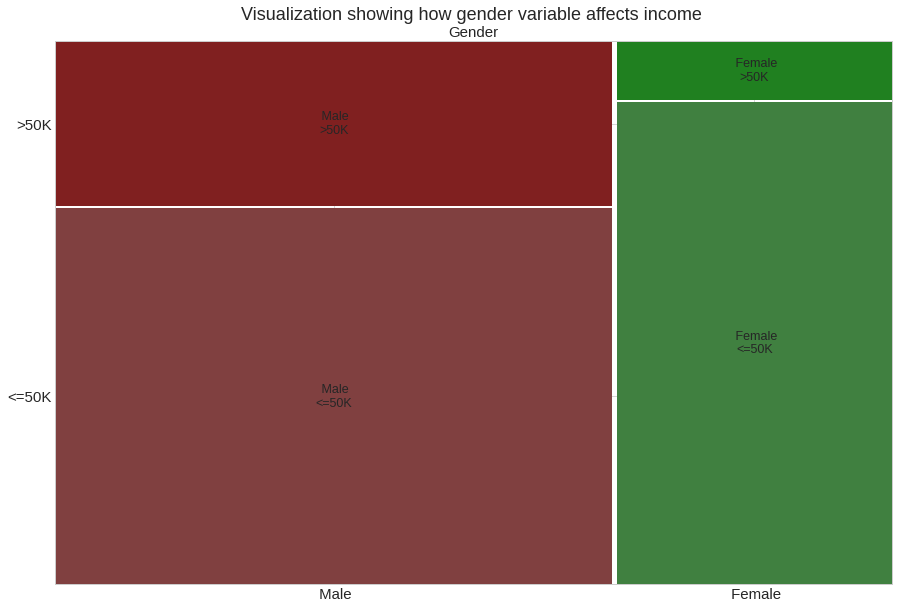

In [17]:
#Relationship between Gender and Income varible
sns.countplot(adultdata.sex,hue=adultdata['income'])
plt.title('Visualization showing how gender affecting income')
plt.show()
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams["figure.figsize"]=(15, 10)
mosaic(data=adultdata,index=['sex','income'],title='Visualization showing how gender variable affects income ')
plt.xlabel('Gender')
plt.ylabel('Income')
plt.show()

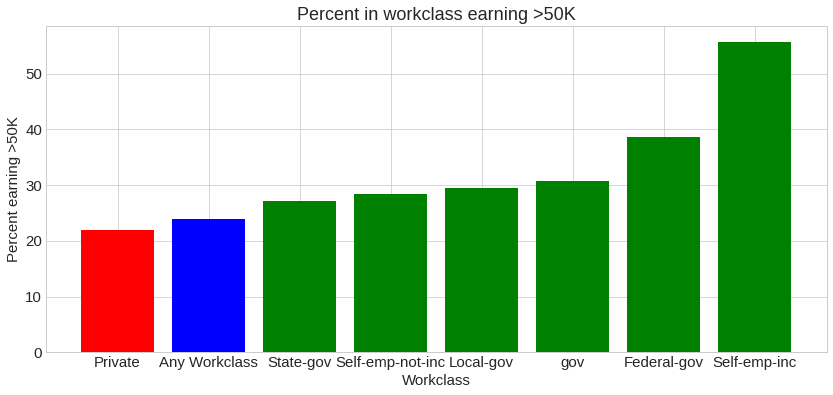

In [18]:
#Relationship between workclass and salary
workclass = []
def printper(colname,colvalue):
    nds = adultdata.loc[:,[colname,"income"]]
    #nds['income'] = nds['income'] == "<=50K"
    nds = nds[nds[colname].str.contains(colvalue)]
    ptotal = nds.shape[0]
    nds = nds[nds['income'].str.contains(">50K")]
    lptotal = nds.shape[0]
    per = 0.0
    per = (lptotal/ptotal) * 100.00
    #print("For "+colname+" "+colvalue+" percent of >50k is "+str(per) + "total "+str(ptotal))
    return per
wclass = ["Private","Self-emp-not-inc","Self-emp-inc","Federal-gov","Local-gov","State-gov","gov"]
for w in wclass:
  pr = printper("workclass",w)
  workclass.append(pr)
wclass.insert(0,"Any Workclass")
workclass.insert(0,23.93)
x_pos = [i for i, _ in enumerate(wclass)]
plt.subplots(figsize=(14, 6))
col = []
for val in workclass:
    if val > 23.93:
        col.append('green')
    elif val < 23.93:
        col.append('red')
    else:
        col.append('blue')
ds = pd.DataFrame({"workclass": wclass,"percent": workclass,"color":col})
df_sorted= ds.sort_values('percent')
plt.bar("workclass","percent",data=df_sorted,color=df_sorted['color'])
plt.xlabel("Workclass")
plt.ylabel("Percent earning >50K")
plt.title("Percent in workclass earning >50K")
plt.show()

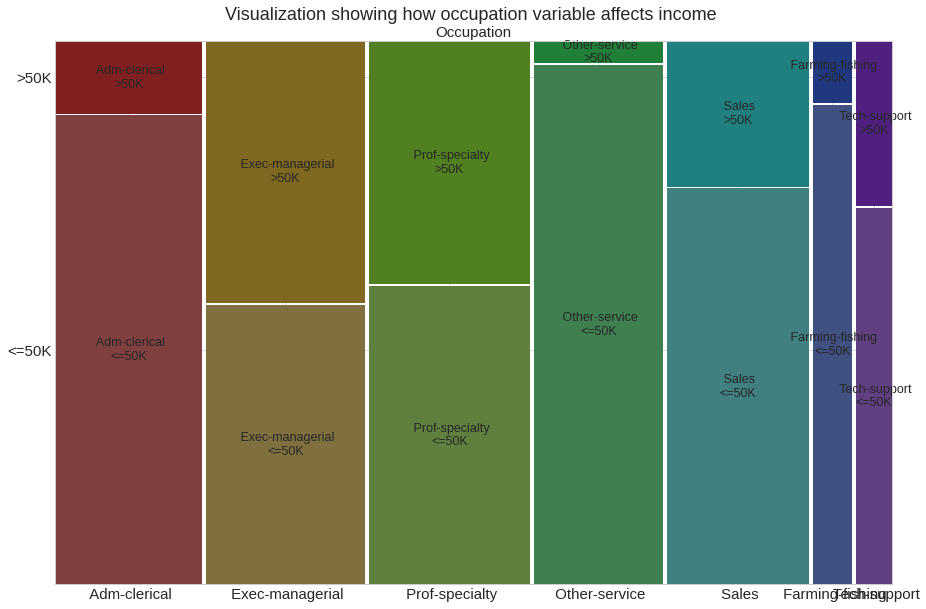

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


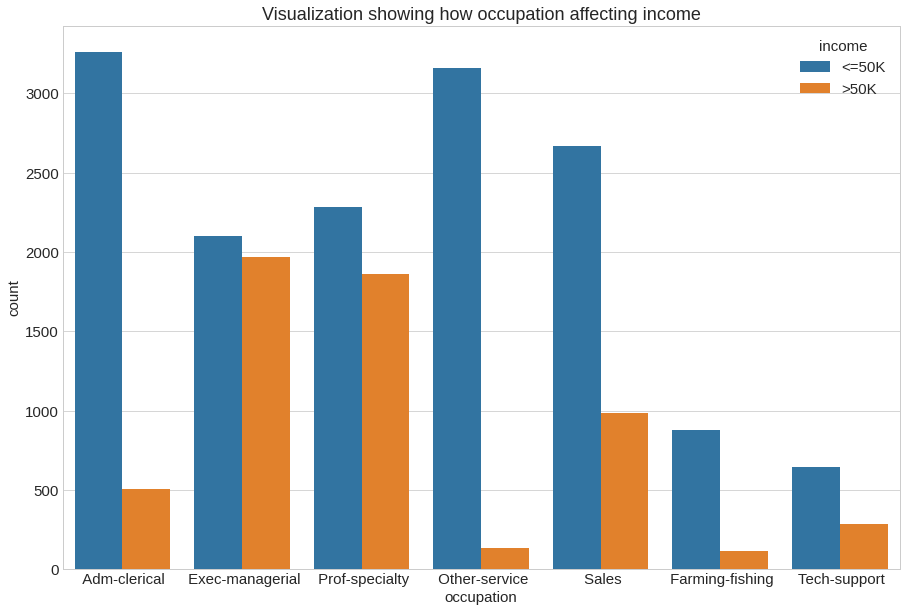

In [19]:

from statsmodels.graphics.mosaicplot import mosaic
#plt.rcParams["figure.figsize"]=(15, 4)
#otion = ["Tech-support","Other-service","Sales","Exec-managerial","Adm-clerical","Farming-fishing","Armed-Forces","Prof-specialty"]
#odata = adultdata[adultdata["occupation"]=="Tech-support"]
def is_occ_in_list(occupation):
    otion = ["Tech-support","Other-service","Sales","Exec-managerial","Adm-clerical","Farming-fishing","Prof-specialty"]
    bin=False
    if occupation.strip() in otion:
        bin=True
    return bin
adultdata['occ'] = adultdata['occupation'].apply(is_occ_in_list)
mydata = adultdata[adultdata['occ']==True]
mosaic(data=mydata,index=['occupation','income'],title='Visualization showing how occupation variable affects income ')
plt.xlabel('Occupation')
plt.ylabel('Income')
plt.show()
sns.countplot(mydata.occupation,hue=adultdata['income'])
plt.title('Visualization showing how occupation affecting income')
plt.show()

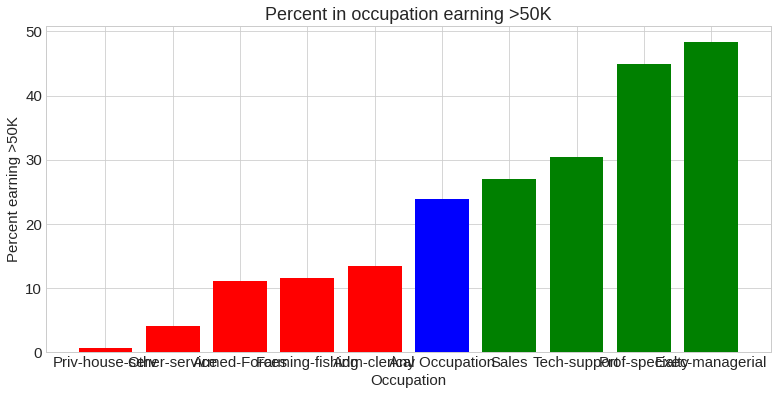

In [20]:
#Relationship between occupation and salary
occupation = ["Tech-support","Other-service","Sales","Exec-managerial","Adm-clerical","Farming-fishing","Priv-house-serv","Armed-Forces","Prof-specialty"]
o_per = []
for o in occupation:
  pr = printper("occupation",o)
  o_per.append(pr)
occupation.insert(0,"Any Occupation")
o_per.insert(0,23.93)
x_pos = [i for i, _ in enumerate(occupation)]
plt.subplots(figsize=(13, 6))
col = []
for val in o_per:
    if val > 23.93:
        col.append('green')
    elif val < 23.93:
        col.append('red')
    else:
        col.append('blue')
ds = pd.DataFrame({"occupation": occupation,"percent": o_per,"color":col})
df_sorted= ds.sort_values('percent')
#plt.bar(x_pos, o_per, color=col)
plt.bar("occupation","percent",data=df_sorted,color=df_sorted['color'])
plt.xlabel("Occupation")
plt.ylabel("Percent earning >50K")
plt.title("Percent in occupation earning >50K")
#plt.xticks(x_pos, occupation)
plt.show()


4031.974280247181
1045.7085997281692
330.9204310085741
6517.741653663021
6699.076896858851
317.2303857833171


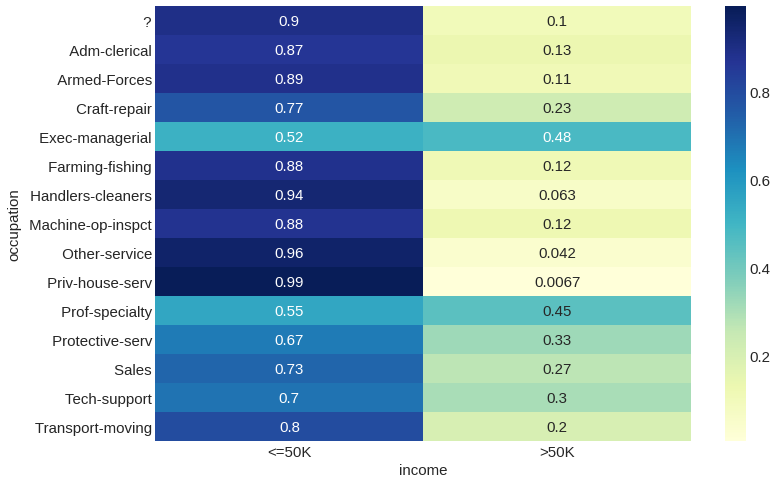

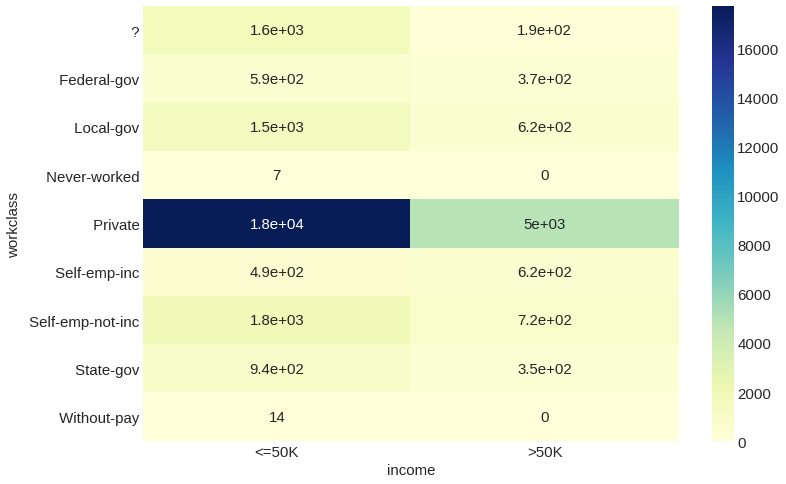

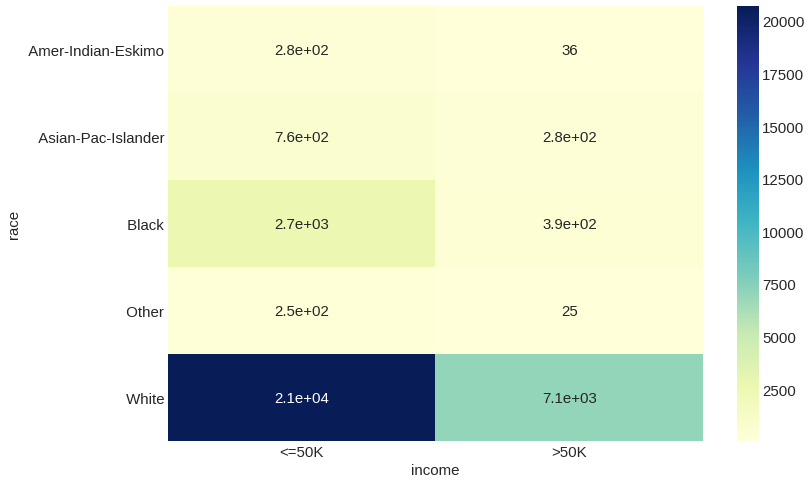

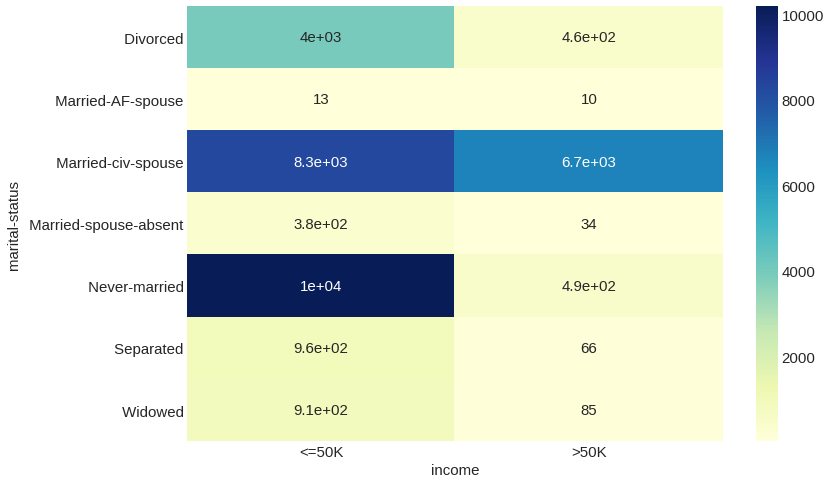

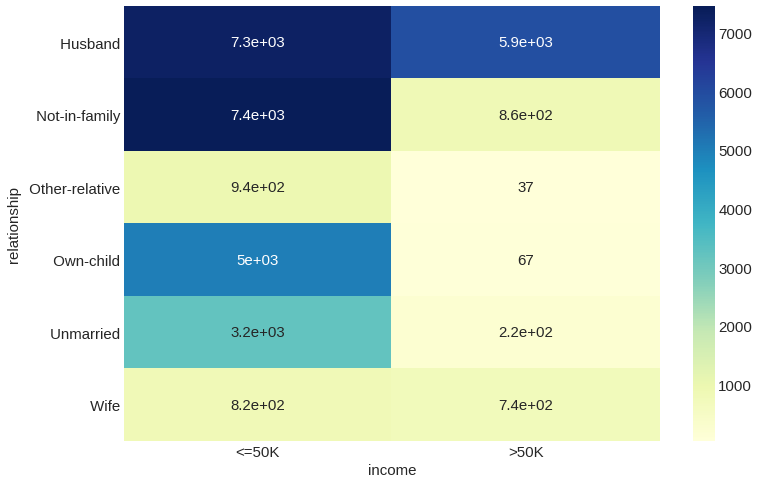

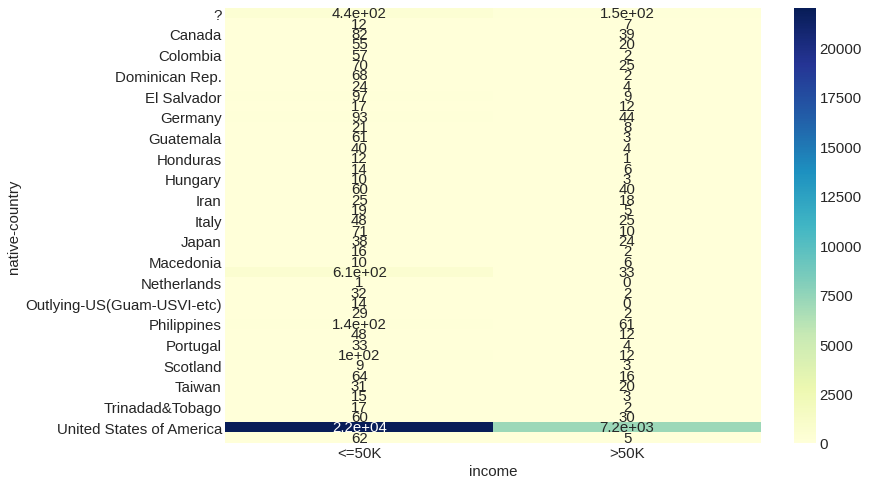

In [21]:
contigencyn= pd.crosstab(adultdata['occupation'], adultdata['income'] ,normalize='index') 
contigency= pd.crosstab(adultdata['occupation'], adultdata['income']) 
plt.figure(figsize=(12,8)) 
sns.heatmap(contigencyn, annot=True, cmap="YlGnBu")
c, p, dof, expected = scipy.stats.chi2_contingency(contigency.T)
from scipy.stats import chi2
significance = 0.01
p1 = 1 - significance
critical_value = chi2.ppf(p1, dof)
print(c)
#print(critical_value)
#print(c)
contingency2 = pd.crosstab(adultdata['workclass'],adultdata['income'])
plt.figure(figsize=(12,8)) 
sns.heatmap(contingency2, annot=True, cmap="YlGnBu")
c, p, dof, expected = scipy.stats.chi2_contingency(contingency2.T)
print(c)
contingency3 = pd.crosstab(adultdata['race'],adultdata['income'])
plt.figure(figsize=(12,8)) 
sns.heatmap(contingency3, annot=True, cmap="YlGnBu")
c, p, dof, expected = scipy.stats.chi2_contingency(contingency3.T)
print(c)
contingency4 = pd.crosstab(adultdata['marital-status'],adultdata['income'])
plt.figure(figsize=(12,8)) 
sns.heatmap(contingency4, annot=True, cmap="YlGnBu")
c, p, dof, expected = scipy.stats.chi2_contingency(contingency4.T)
print(c)
contingency5 = pd.crosstab(adultdata['relationship'],adultdata['income'])
plt.figure(figsize=(12,8)) 
sns.heatmap(contingency5, annot=True, cmap="YlGnBu")
c, p, dof, expected = scipy.stats.chi2_contingency(contingency5.T)
print(c)
contingency6 = pd.crosstab(adultdata['native-country'],adultdata['income'])
plt.figure(figsize=(12,8)) 
sns.heatmap(contingency6, annot=True, cmap="YlGnBu")
c, p, dof, expected = scipy.stats.chi2_contingency(contingency6.T)
print(c)

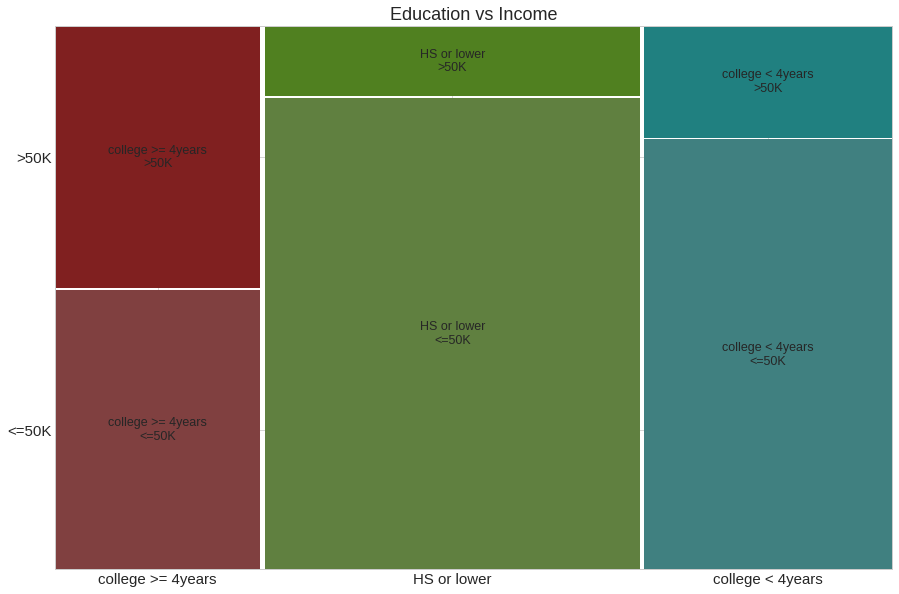

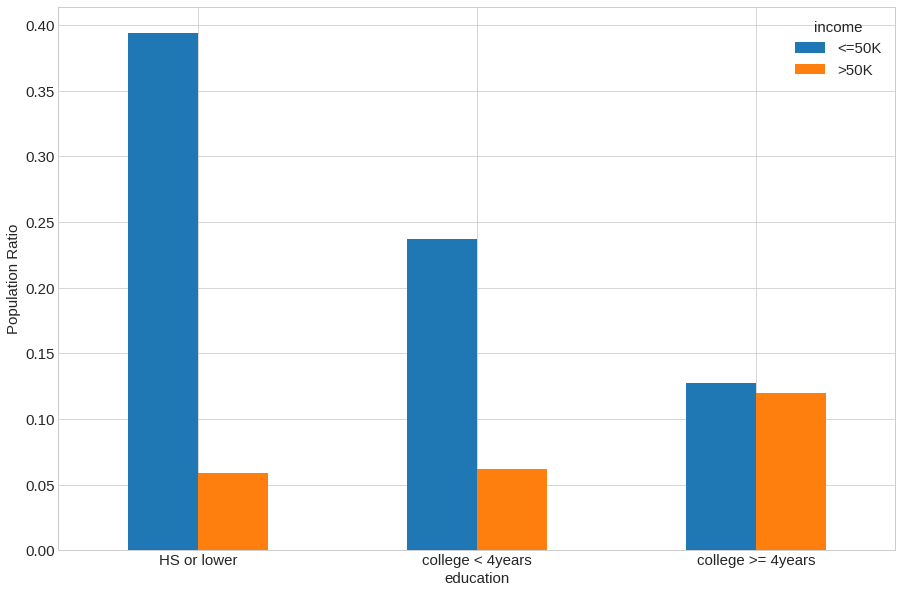

In [22]:
#relationship between education and income

def find_edu_bin(edu):
    HS = ['9th', '7th-8th', '12th', '1st-4th', '10th', '5th-6th', 'Preschool', '11th', 'HS-grad']
    college_any = ['Assoc-acdm', 'Assoc-voc','Some-college']
    college_degree = ['Bachelors', 'Prof-school', 'Masters', 'Doctorate']
    bin=''
    if edu.strip() in HS:
        bin='HS or lower'
    elif edu.strip() in college_any:
        bin= 'college < 4years'
    elif edu.strip() in college_degree:
        bin= 'college >= 4years'
    return bin



adultdata['edu_bin'] = adultdata['education'].apply(find_edu_bin)
mosaic(adultdata, ['edu_bin','income'], title="Education vs Income")
# print(len(adultdata))
total = len(adultdata)
adultdata_grp = adultdata.groupby(['edu_bin','income']).size().unstack().transform(lambda x : x/total)
# print(adultdata_grp)
adultdata_grp.plot(kind='bar')
plt.xlabel('education')
plt.ylabel('Population Ratio')
plt.xticks(rotation=0)
plt.show()

3673.634106084828


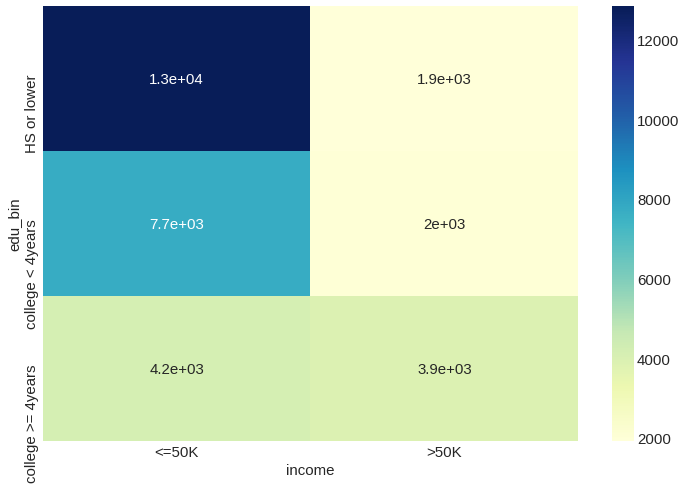

In [23]:
contingency7 = pd.crosstab(adultdata['edu_bin'],adultdata['income'])
plt.figure(figsize=(12,8)) 
sns.heatmap(contingency7, annot=True, cmap="YlGnBu")
c, p, dof, expected = scipy.stats.chi2_contingency(contingency7.T)
print(c)

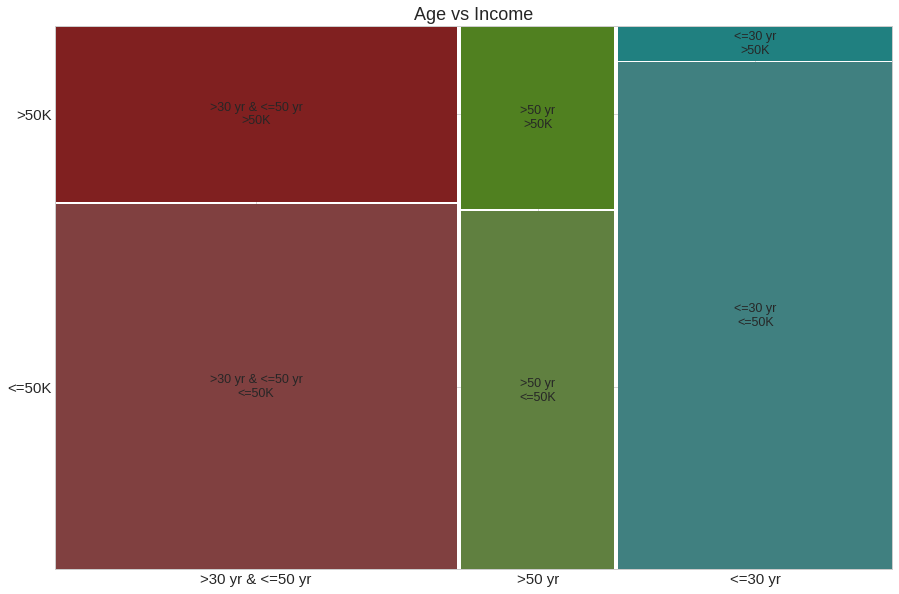

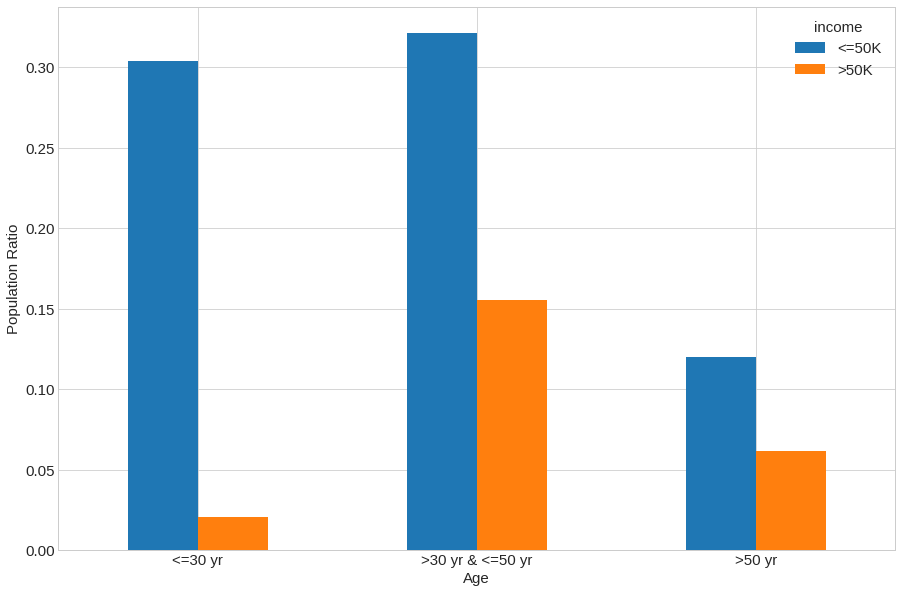

In [24]:
# Relationship age and income
def find_age_bin(age):
    if age <=30:
        return '<=30 yr'
    elif age >30 and age <= 50:
        return '>30 yr & <=50 yr'
    elif age > 50 and age <= 70:
        return '>50 yr'



adultdata['age_bin'] = adultdata['age'].apply(find_age_bin)
mosaic(adultdata, ['age_bin','income'], title="Age vs Income")
adultdata_age = adultdata.groupby(['age_bin', 'income']).size().unstack().fillna(0).transform(lambda x : x/len(adultdata))
adultdata_age.plot(kind='bar')
plt.xlabel('Age')
plt.ylabel('Population Ratio')
plt.xticks(rotation=0)
plt.show()

2712.716062472601


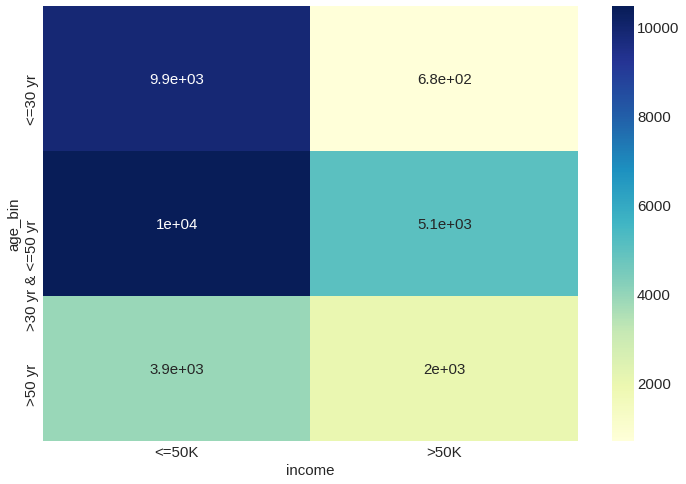

In [25]:
contingency8 = pd.crosstab(adultdata['age_bin'],adultdata['income'])
plt.figure(figsize=(12,8)) 
sns.heatmap(contingency8, annot=True, cmap="YlGnBu")
c, p, dof, expected = scipy.stats.chi2_contingency(contingency8.T)
print(c)

(array([-50.,   0.,  50., 100., 150.]),
 <a list of 5 Text major ticklabel objects>)

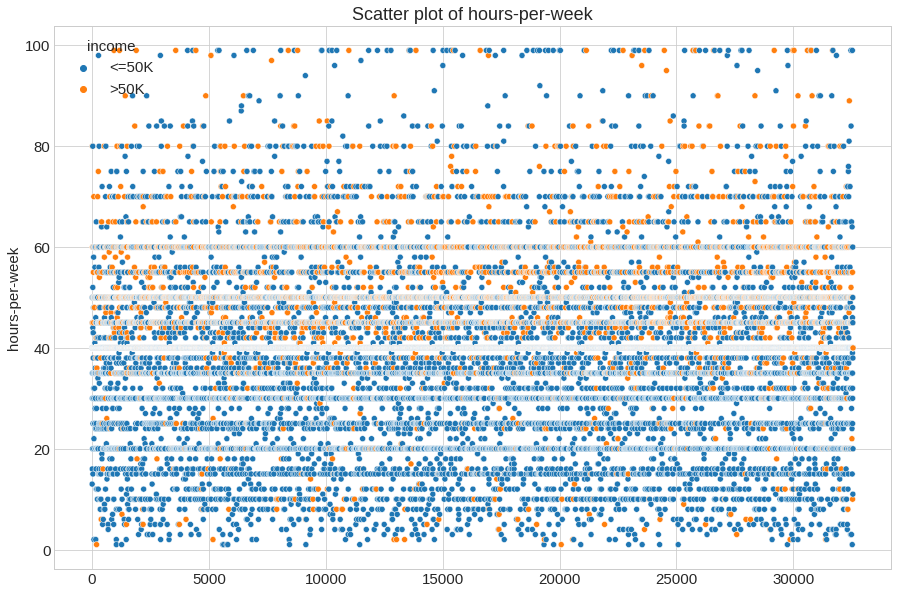

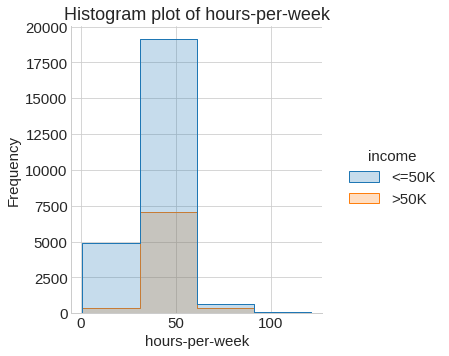

In [26]:
sns.scatterplot(x=adultdata.index, y=adultdata['hours-per-week'], hue=adultdata['income'])
plt.title("Scatter plot of hours-per-week")
ax = sns.displot(adultdata, x="hours-per-week", hue="income", element="step", binwidth=30)
plt.ylabel('Frequency')
plt.title('Histogram plot of hours-per-week')
adultdata_age = adultdata.groupby(['hours-per-week', 'income']).size().unstack().fillna(0).transform(lambda x : x/len(adultdata))
# adultdata_age.plot(kind='bar')
# plt.xlabel('hours-per-week')
# plt.ylabel('Population Ratio')
plt.xticks(rotation=0)